# Machine learning Prima Prediction

Predict **diabetes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
d = pd.read_csv("data/pima-data.csv")
d.shape

(768, 10)

In [ ]:
d.head(n=5)

In [ ]:
d.isnull().values.any()

In [ ]:
plt.matshow(d.corr());

In [ ]:
d.corr()

In [3]:
del d["skin"]

In [ ]:
d.head(5)

In [4]:
d["diabetes"] = d["diabetes"].map({True: 1, False: 0})

In [ ]:
d.head(5)

In [ ]:
print(len(d.loc[d["diabetes"] == True]))
print(len(d.loc[d["diabetes"] == False]))

print(len(d.loc[d["diabetes"] == True]) * 100 // (len(d.loc[d["diabetes"] == True]) + len(d.loc[d["diabetes"] == False])))

In [ ]:
d.iloc[0].plot(kind='bar');

In [ ]:
d.head(1).plot(kind='bar');

In [ ]:
d.head(1)

In [ ]:
d.iloc[0]

In [ ]:
plt.plot(d["age"].head(10).values, color="r");

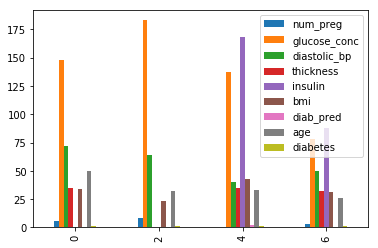

In [38]:
# d.loc([d["diabetes"] == True]).plot(kind="bar")
d[d["diabetes"] == True].head(4).plot(kind="bar")

In [ ]:
plt.bar(d.head(10)["age"].values, d.head(10)["age"].values)

In [ ]:
sorted(d.head(10)["age"].values)

# Training

In [18]:
feature_cols = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_cols = ['diabetes']

x = d[feature_cols].values
y = d[predicted_cols].values

split_size = .3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_size, random_state=42)

In [10]:
imp = Imputer(missing_values=0, strategy='mean', axis=0)

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

In [11]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [22]:
gnb_predict_train = gnb_model.predict(x_train)

from sklearn import metrics

metrics.accuracy_score(y_train, gnb_predict_train)

0.73556797020484166

In [ ]:
gnb_predict_test = gnb_model.predict(x_test)

print(gnb_predict_test)
print(y_test.ravel())

metrics.accuracy_score(y_test, gnb_predict_test)

ValueError: x and y must be the same size

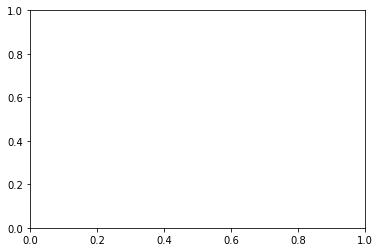

In [25]:
plt.scatter(x_train, y_train)
# plt.plot(x_train, y_train)